In [1]:
import pandas as pd
from stegano import lsb
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import scipy.spatial.distance as dist
import string
import random
from essential_generators import DocumentGenerator
from scipy.fftpack import dct
from skimage.io import imread
from tqdm import tqdm


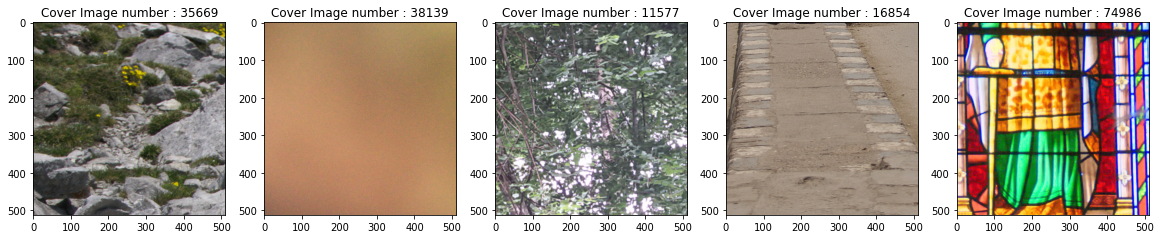

In [2]:
cover_path = "E:\Cover"


def get_cover_image(cover_path):
    cover_image_list = []
    fig, axes = plt.subplots(ncols=5, figsize=(20, 20))

    for i, img in enumerate(np.random.randint(0, len(os.listdir(cover_path)), 5)):
        img_name = str(img)
        if len(img_name) < 5:
            img_name = "0"*(5-len(img_name))+img_name
        try:
            cover_image = plt.imread(cover_path+"/"+img_name+".jpg")
            axes[i].imshow(cover_image)
            axes[i].set_title("Cover Image number : {}".format(img_name))
        except:
            img_name = str(int(img_name)+5)
            cover_image = plt.imread(cover_path+"/"+img_name+".jpg")
            axes[i].imshow(cover_image)
            axes[i].set_title("Cover Image number : {}".format(img_name))
        cover_image_list.append(cover_path+"/"+img_name+".jpg")

    return cover_image_list


cover_image_list = get_cover_image(cover_path)


In [3]:
cover_final_path = "E:\Cover"
juniward_final_path = "E:\JUNIWARD"
cover_final_path_list = []
juniward_final_path_list = []
pixel_cover = []
pixel_juniward = []


def get_train_data(cover_final_path, juniward_final_path):
    train_df = pd.DataFrame()
    train_df_2 = pd.DataFrame()
    for path in tqdm(os.listdir(cover_final_path)[:7500]):
        cover_final_path_list.append(cover_final_path+"/"+path)
        im = Image.open(cover_final_path+"/"+path)
        im = im.convert('L')
        im = im.resize((200, 200), 1)
        im = np.array(im)
        pixel_cover.append(im)
    train_df["Images"] = cover_final_path_list
    train_df["Label"] = 0

    for path in tqdm(os.listdir(juniward_final_path)[:7500]):
        juniward_final_path_list.append(juniward_final_path+"/"+path)
        im = Image.open(juniward_final_path+"/"+path)
        im = im.convert('L')
        im = im.resize((200, 200), 1)
        im = np.array(im)
        pixel_juniward.append(im)
    train_df_2["Images"] = juniward_final_path_list
    train_df_2["Label"] = 1

    train_df = train_df.append(train_df_2)
    return train_df, pixel_cover, pixel_juniward


train_df, pixel_cover, pixel_juniward = get_train_data(
    cover_final_path, juniward_final_path)

Y = train_df["Label"].values
pixel_cover = np.array(pixel_cover)
pixel_juniward = np.array(pixel_juniward)
X = np.concatenate([pixel_cover, pixel_juniward])
X = X.reshape(15000, 200, 200, 1)


100%|██████████| 7500/7500 [00:23<00:00, 321.75it/s]


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization


In [5]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),
          activation='relu', input_shape=(200, 200, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 128)     1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 99, 99, 128)       512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        3

In [6]:
model.fit(X, Y, batch_size=20, epochs=5, validation_split=0.2)


Epoch 1/5
600/600 [==============================] - 804s 1s/step - loss: 0.5219 - val_loss: 0.4212
Epoch 2/5
600/600 [==============================] - 811s 1s/step - loss: 0.2815 - val_loss: 0.3898
Epoch 3/5
  5/600 [..............................] - ETA: 13:10 - loss: 0.2563